# Launch!  
1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).  
2. Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops.  
    - Beware of slow degradation too: models tend to "rot" as data evolves.   
    - Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).  
    - Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values, or another team's output becoming stale). This is  particulary important for online learning systems.  
3. Retrain your models on a regular basis on fresh data (automate as much as possible). 

# Model deployment
Time to deploy our model and make it online in the world.

Checklist:

- [ ] Pick the best model out of RF and NN
- [ ] Save the model
- [ ] Organize it into a pipeline
- [ ] Heroku
- [ ] CircleCI
- [ ] Testing - PYTEST / TOX
- [ ] Gemfury
- [ ] Packaging
- [ ] Docker
- [ ] GUnicorn
- [ ] Keras, Theano, Tensorflow
- [ ] Bash scripts




In [41]:
from fmi import FMI
f = FMI(place='Kumpula')
# f.observations() returns a list of Observation -objects for the last X hours.

In [42]:
obs = f.observations()

In [43]:
obs[6].temperature

nan

In [22]:
print(obs[6].radiation_global_accumulation)

None


In [44]:
f = FMI(place='Kumpula')
# f.forecast() returns a list of Observation -objects (sorry, confusing, I know :P) for the next 36 hours

In [45]:
forecast=f.forecast()

In [46]:
forecast

[<Observation: 2020-05-05T13:00:00+00:00 - 11.1 C>,
 <Observation: 2020-05-05T14:00:00+00:00 - 10.9 C>,
 <Observation: 2020-05-05T15:00:00+00:00 - 10.8 C>,
 <Observation: 2020-05-05T16:00:00+00:00 - 10.3 C>,
 <Observation: 2020-05-05T17:00:00+00:00 - 9.6 C>,
 <Observation: 2020-05-05T18:00:00+00:00 - 8.6 C>,
 <Observation: 2020-05-05T19:00:00+00:00 - 7.5 C>,
 <Observation: 2020-05-05T20:00:00+00:00 - 6.6 C>,
 <Observation: 2020-05-05T21:00:00+00:00 - 6.1 C>,
 <Observation: 2020-05-05T22:00:00+00:00 - 6.4 C>,
 <Observation: 2020-05-05T23:00:00+00:00 - 5.4 C>,
 <Observation: 2020-05-06T00:00:00+00:00 - 4.8 C>,
 <Observation: 2020-05-06T01:00:00+00:00 - 4.4 C>,
 <Observation: 2020-05-06T02:00:00+00:00 - 3.6 C>,
 <Observation: 2020-05-06T03:00:00+00:00 - 3.0 C>,
 <Observation: 2020-05-06T04:00:00+00:00 - 3.8 C>,
 <Observation: 2020-05-06T05:00:00+00:00 - 5.8 C>,
 <Observation: 2020-05-06T06:00:00+00:00 - 8.1 C>,
 <Observation: 2020-05-06T07:00:00+00:00 - 10.3 C>,
 <Observation: 2020-05-06T

In [52]:
forecast[3].radiation_global_accumulation

21900510.0

In [57]:
(forecast[9].radiation_global_accumulation - forecast[8].radiation_global_accumulation)

2206.0

In [39]:
forecast[0].humidity

66.77

In [40]:
forecast[0].precipitation_1h

0.0

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [59]:
X_train = pd.read_csv('../datasets/scaled_train_test/X_train_standard.csv', delimiter=',')
X_test = pd.read_csv('../datasets/scaled_train_test/X_test_standard.csv', delimiter=',')
y_train = X_train['Value (kWh)']
y_test = X_test['Value (kWh)']
X_train.drop(['Value (kWh)'], axis=1, inplace=True)
X_test.drop(['Value (kWh)'], axis=1, inplace=True)

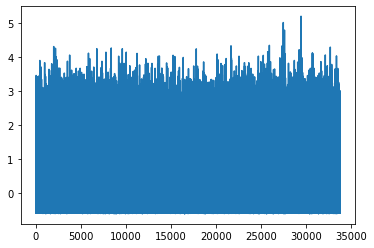

In [60]:
X_train['Global radiation (W/m2)'].plot()